# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_22_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,CTC-523E23.14,CTD-2050N2.1,DDX43P2,GLUD1P4,LINC01446,LINC01602,RNF212,RP11-123J14.1,RP11-326N17.1,RP11-353N14.5
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,30.21949,21.00825,20.99301,21.10114
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.01388,21.02976,20.99861,21.07023,22.16510,21.03733,30.76723,21.00825,20.99301,21.10114
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,27.61482,21.00825,20.99301,21.10114
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,32.89925,21.00825,20.99301,21.10114
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,23.21111,21.00825,20.99301,21.10114


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,1:58] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

      Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0    62.0   0.0   0.0                        2.0   
1    67.0   0.0   0.0                        2.0   
2    62.0   0.0   0.0                        1.0   
3    60.0   0.0   0.0                        3.0   
4    76.0   0.0   0.0                        2.0   
..    ...   ...   ...                        ...   
176  77.0   0.0   0.0                        1.0   
177  54.0   0.0   0.0                        1.0   
178  64.0   0.0   0.0                        1.0   
179  75.0   0.0   0.0                        1.0   
180  50.0   0.0   0.0                        1.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                962.0             
1                                                254.0             
2                                                800.0             
3                                                790.0             
4                                  

In [4]:
X.columns

Index(['Age', 'Sarc', 'Rhab', 'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-009', 'Cohort_CM-010',
       'Cohort_CM-025', 'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE',
       'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE',
       'IMDC_INTERMEDIATE', 'IMDC_NOT_REPORTED', 'IMDC_POOR',
       'ImmunoPhenotype_Desert', 'ImmunoPhenotype_Excluded',
       'ImmunoPhenotype_Infiltrated', 'ImmunoPhenotype_NA', 'AC006007.1',
       'AC006262.10', 'AC006296.2', 'AC010729.2', 'AC012363.13', 'AC013436.6',
       'AC023128.1', 'AC078842.3', 'AC091814.2', 'AP000997.2', 'AP006285.7',
       'CTC-436K13.4', 'CTC-523E23.14', 'CTD-2050N2.1', 'DDX43P2', 'GLUD1P4',
       'LINC01446', 'LINC01602', 'RNF212', 'RP11-123J14.1', 'RP11-326N17.1',
       'RP11-353N14.5'],
      dtype='object')

### 3. Train-Test dataset split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [6]:
param_grid = {'C': [1,2,5,7,10],
            'max_iter':[1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10], 'max_iter': [1000000],
                         'random_state': [125]})

In [7]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=1000000, random_state=125)

In [8]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.8261083743842365


In [9]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [10]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [11]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.9027777777777778
Final accuracy on the testing dataset: 0.7297297297297297


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[57  8]
 [ 6 73]]
Input data:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
Prediction:        [0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0]


In [13]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        65
           1       0.90      0.92      0.91        79

    accuracy                           0.90       144
   macro avg       0.90      0.90      0.90       144
weighted avg       0.90      0.90      0.90       144



In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[15  5]
 [ 5 12]]
Input data:  [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1]
Prediction:        [1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1]


In [15]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.71      0.71      0.71        17

    accuracy                           0.73        37
   macro avg       0.73      0.73      0.73        37
weighted avg       0.73      0.73      0.73        37



### 7. Results visualizaton

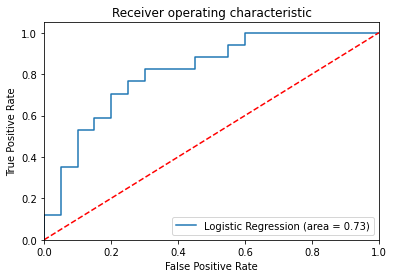

In [16]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

*Everolimus test*

In [17]:
path ='../../../../Data_preprocessing/Testing with everolimus/RNA+Clinic joined/Clinical_data_and_RNA_30_Features_everolimus.csv'
data = pd.read_csv(path)

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
data=data.drop(['Unnamed: 0', 'PFS', 'RNA_ID'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '../../../../Data_preprocessing/Testing with everolimus/RNA+Clinic joined/Clinical_data_and_RNA_30_Features_everolimus.csv'

In [ ]:
data.head(5)

,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,TM_TC_Ratio,Cohort_CM-009,Cohort_CM-010,Cohort_CM-025,...,RP11-96O20.4,RP5-827C21.1,RPS12P26,SDR42E1,SNORD113-5,TARBP2,TRAV41,TRIM43B,VN2R17P,XPC
0,63.0,0.0,0.0,1.0,727.50000,-1.204819,1.410021,0.0,0.0,1,...,20.77248,27.09131,31.45042,28.23012,21.27932,31.08288,25.86902,25.51490,20.93829,31.96084
1,63.0,0.0,0.0,1.0,724.75000,-1.204819,1.410021,0.0,0.0,1,...,21.03524,26.79393,28.60666,27.55631,20.88605,30.93771,29.24738,23.29578,20.99449,32.62522
2,63.0,0.0,0.0,1.0,723.37500,-1.204819,1.410021,0.0,0.0,1,...,21.03524,25.96827,29.55728,28.44482,20.88605,32.20350,30.68048,20.68433,20.99449,32.66731
3,63.0,0.0,0.0,1.0,722.68750,-1.204819,1.410021,0.0,0.0,1,...,21.03524,26.26191,28.32744,30.92530,20.88605,30.41685,29.69705,23.83079,20.99449,32.59007
4,63.0,0.0,0.0,1.0,723.03125,-1.204819,1.410021,0.0,0.0,1,...,21.03524,25.45149,29.25251,29.51644,20.88605,31.69236,21.47750,20.68433,20.99449,32.31981


In [ ]:
data.columns

Index(['Age', 'Sarc', 'Rhab', 'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-009', 'Cohort_CM-010',
       'Cohort_CM-025', 'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE',
       'MSKCC_INTERMEDIATE', 'MSKCC_POOR', 'MSKCC_NA', 'IMDC_FAVORABLE',
       'IMDC_INTERMEDIATE', 'IMDC_NOT_REPORTED', 'IMDC_POOR',
       'ImmunoPhenotype_Desert', 'ImmunoPhenotype_Infiltrated',
       'ImmunoPhenotype_Excluded', 'ImmunoPhenotype_NA', 'AC005307.1',
       'ATP5G2P1', 'DLGAP4', 'EIF4A1P9', 'FAM172BP', 'FAM224A', 'GJA9',
       'GPR155', 'GYPE', 'IL25', 'KLHL5', 'LANCL1-AS1', 'LEMD1', 'PCMT1',
       'RP11-120J4.1', 'RP11-20G6.3', 'RP11-349G13.2', 'RP11-374M1.2',
       'RP11-536C10.21', 'RP11-95G17.2', 'RP11-96O20.4', 'RP5-827C21.1',
       'RPS12P26', 'SDR42E1', 'SNORD113-5', 'TARBP2', 'TRAV41', 'TRIM43B',
       'VN2R17P', 'XPC'],
      dtype='object')

In [ ]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(data)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(Y),1) :
    if (yhatTest[i] == Y[i]):
        contTest = contTest + 1

print('Final accuracy on the testing dataset: ' + str(contTest/len(Y)))

Final accuracy on the testing dataset: 0.6384615384615384


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(Y)))
print('Prediction:        ' +str(yhatTest))


print(classification_report(Y, yhatTest))

----------------Confusion Matrix (Test)------------------
[[13 47]
 [ 0 70]]
Input data:  [1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0]
Prediction:        [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.22      0.36        60
           1       0.60      1.00      0.75        70

    accuracy                           0.64       130
   macro avg       0.80      0.61      0.55       130
weighted avg       0.78      0.64      0.57       130

